# Overview

We're now switching focus away from the Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. Remember that the overall point of the course is to analyze networks where you have access to information (in this case text) about each node. In this class we keep it old-school and stay away from LSTM's, transformers, etc. I want to show you that you can get pretty far with good old fashioned statistics when you work with text.

In other words, today will be all about the very first steps in teaching your computer to "understand" text. This ties in nicely with our work on wikipedia, since wikipedia is a network of connected pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

I know that last week as a little bit intense in terms of workload, so I've made today an easy one. 

# Part 1: A little lecture

> **_Video Lecture_**. Today is all about ***working*** with NLTK, so not much lecturing - you can get my perspective and a little pep-talk

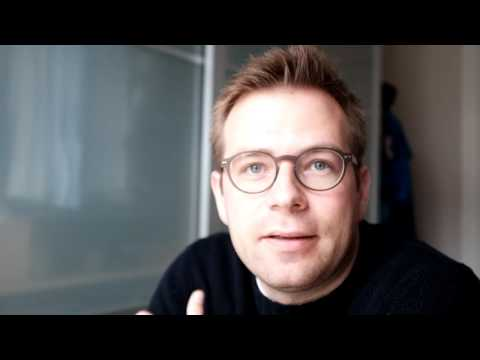

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("Ph0EHmFT3n4",width=800, height=450)

# Part 2: Installing and the basics

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1, Sections 1.1, 1.2, 1.3\. [It's free online](http://www.nltk.org/book/). 


> *Exercises*: NLPP Chapter 1\.
> 
> * First, install `nltk` if it isn't installed already (there are some tips below that I recommend checking out before doing installing)
> * Second, work through chapter 1. The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you to add a few variations and see what happens***. Some of those examples might very well be due as assignments (see below the install tips), so those ones should definitely be in a `notebook`. 
 

### NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora, tokenizers, the collection of books, etc by typing `nltk.download("book")`. The output will tell you where NLTK is storing the data in your system. The total download size is about 371mb.

> *Exercises: From NLPP Chapter 1.
> 
> The following exercises from Chapter 1 are what might be due in an assignment later on.
>
> * Try out the `concordance` method, using another text and a word of your own choosing.
> * Also try out the `similar` and `common_context` methods for a few of your own examples.
> * Create your own version of a dispersion plot ("your own version" means another text and different word).
> * Explain in your own words what aspect of language _lexical diversity_ describes. 
> * Create frequency distributions for `text2`, including the cumulative frequency plot for the 75 most common words.
> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
> * Work through ex 2-12 in NLPP's section 1.8\. 
> * Work through exercise 15, 17, 19, 22, 23, 26, 27, 28 in section 1.8\.

<div class="alert alert-block alert-info">
Don't use an LLM for these ones. See if you can solve them yourself. Remember that this is about learning how the NLTK package works, not about just getting to the various results.
</div>

In [52]:
import nltk
from nltk.book import *
import numpy as np
from nltk.corpus import state_union
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import names
from nltk import ConditionalFreqDist
from nltk.corpus import brown
from nltk.corpus import stopwords
from collections import Counter
import random

In [8]:
print(text1)
print(text2)

<Text: Moby Dick by Herman Melville 1851>
<Text: Sense and Sensibility by Jane Austen 1811>


In [11]:
'''There are many ways to examine the context of a text apart from simply
 reading it. A concordance view shows us every occurrence of a given word, together with some context.
'''
print(text1.concordance("monstrous"))

#other words appear in a similar range of contexts
print(text1.similar("monstrous"))

print(text2.similar("monstrous"))

Displaying 11 of 11 matches:
ong the former , one was of a most monstrous size . ... This came towards us , 
ON OF THE PSALMS . " Touching that monstrous bulk of the whale or ork we have r
ll over with a heathenish array of monstrous clubs and spears . Some were thick
d as you gazed , and wondered what monstrous cannibal and savage could ever hav
that has survived the flood ; most monstrous and most mountainous ! That Himmal
they might scout at Moby Dick as a monstrous fable , or still worse and more de
th of Radney .'" CHAPTER 55 Of the Monstrous Pictures of Whales . I shall ere l
ing Scenes . In connexion with the monstrous pictures of whales , I am strongly
ere to enter upon those still more monstrous stories of them which are to be fo
ght have been rummaged out of this monstrous cabinet there is no telling . But 
of Whale - Bones ; for Whales of a monstrous size are oftentimes cast up dead u
None
true contemptible christian abundant few part mean careful puzzled
mystifying passing 

am_glad a_pretty a_lucky is_pretty be_glad
None


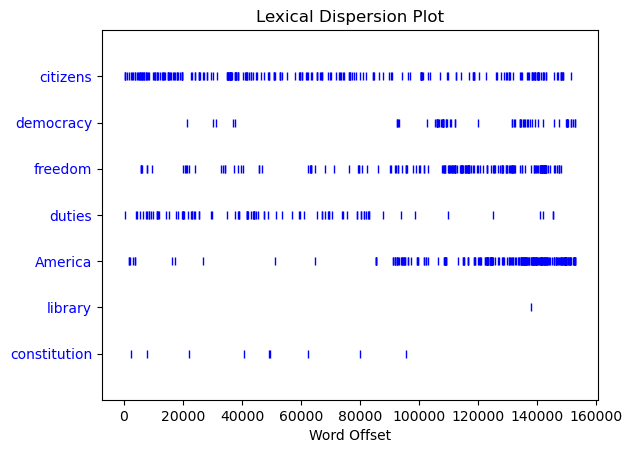

In [13]:
'''The term common_contexts allows us to examine just the
 contexts that are shared by two or more words, '''
print(text2.common_contexts(["monstrous", "very"]))
''' we can also determine the location of a word in the text: how many words from the beginning it appears. This positional 
information can be displayed using a dispersion plot.'''
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America","library","constitution"])

In [14]:
#generating some random text in the various styles
text3.generate()

Building ngram index...


lamb for a burnt offering in the city . , duke Elah , duke Shobal ,
and Akan . and looked upon my affliction . Because the LORD God
amongst the trees of the mighty God of Abraham his father , that they
found a plain man , and the wo The blessings of my hand to do justice
and judgment ; that the LORD that spake unto me , and put him into the
ark , and for your little ones . they heard that they have brought it
unto Hagar , Sarai ' s brother will I slay


"lamb for a burnt offering in the city . , duke Elah , duke Shobal ,\nand Akan . and looked upon my affliction . Because the LORD God\namongst the trees of the mighty God of Abraham his father , that they\nfound a plain man , and the wo The blessings of my hand to do justice\nand judgment ; that the LORD that spake unto me , and put him into the\nark , and for your little ones . they heard that they have brought it\nunto Hagar , Sarai ' s brother will I slay"

In [16]:
#the number of text/tokens
print(len(text3))
# numbers of distinct words/types 
print(sorted(set(text3)))
print(len(set(text3)))
#lexical ricjness
print(len(set(text3)) / len(text3))
#how often a word occurs in a text
print(text4.count('a') / len(text4))
def lexical_diversity(text):
    return len(set(text)) / len(text)
def word_frequence(word,text):
    return text.count(word)/len(text)

44764
['!', "'", '(', ')', ',', ',)', '.', '.)', ':', ';', ';)', '?', '?)', 'A', 'Abel', 'Abelmizraim', 'Abidah', 'Abide', 'Abimael', 'Abimelech', 'Abr', 'Abrah', 'Abraham', 'Abram', 'Accad', 'Achbor', 'Adah', 'Adam', 'Adbeel', 'Admah', 'Adullamite', 'After', 'Aholibamah', 'Ahuzzath', 'Ajah', 'Akan', 'All', 'Allonbachuth', 'Almighty', 'Almodad', 'Also', 'Alvah', 'Alvan', 'Am', 'Amal', 'Amalek', 'Amalekites', 'Ammon', 'Amorite', 'Amorites', 'Amraphel', 'An', 'Anah', 'Anamim', 'And', 'Aner', 'Angel', 'Appoint', 'Aram', 'Aran', 'Ararat', 'Arbah', 'Ard', 'Are', 'Areli', 'Arioch', 'Arise', 'Arkite', 'Arodi', 'Arphaxad', 'Art', 'Arvadite', 'As', 'Asenath', 'Ashbel', 'Asher', 'Ashkenaz', 'Ashteroth', 'Ask', 'Asshur', 'Asshurim', 'Assyr', 'Assyria', 'At', 'Atad', 'Avith', 'Baalhanan', 'Babel', 'Bashemath', 'Be', 'Because', 'Becher', 'Bedad', 'Beeri', 'Beerlahairoi', 'Beersheba', 'Behold', 'Bela', 'Belah', 'Benam', 'Benjamin', 'Beno', 'Beor', 'Bera', 'Bered', 'Beriah', 'Bethel', 'Bethlehem', 'B

[(',', 9397), ('to', 4063), ('.', 3975), ('the', 3861), ('of', 3565), ('and', 3350), ('her', 2436), ('a', 2043), ('I', 2004), ('in', 1904), ('was', 1846), ('it', 1568), ('"', 1506), (';', 1419), ('she', 1333), ('be', 1305), ('that', 1297), ('for', 1234), ('not', 1212), ('as', 1179), ('you', 1037), ('with', 971), ('had', 969), ('his', 941), ('he', 895), ("'", 883), ('have', 807), ('at', 806), ('by', 737), ('is', 728), ('."', 721), ('s', 700), ('Elinor', 684), ('on', 676), ('all', 642), ('him', 633), ('so', 617), ('but', 597), ('which', 592), ('could', 568), ('Marianne', 566), ('my', 551), ('Mrs', 530), ('from', 527), ('would', 507), ('very', 492), ('no', 488), ('their', 463), ('them', 462), ('--', 461), ('been', 440), ('were', 437), ('me', 433), ('they', 428), ('more', 406), ('said', 397), (',"', 396), ('any', 389), ('what', 375), ('this', 372), ('-', 366), ('every', 361), ('than', 360), ('will', 354), ('or', 353), ('your', 347), ('an', 346), ('such', 340), ('one', 304), ('do', 296), ('

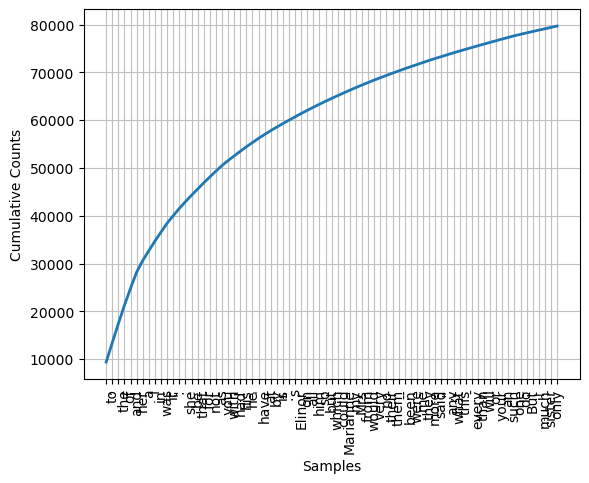

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

In [17]:
#frequency distribution
fdis = FreqDist(text2)
print(fdis.most_common(75))
fdis.plot(75, cumulative=True)

In [19]:
#bigrams
list(bigrams(['more', 'is', 'said', 'than', 'done']))
text4.collocations()

United States; fellow citizens; years ago; four years; Federal
Government; General Government; American people; Vice President; God
bless; Chief Justice; one another; fellow Americans; Old World;
Almighty God; Fellow citizens; Chief Magistrate; every citizen; Indian
tribes; public debt; foreign nations


['monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python', 'monty', 'python']
['Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ishmael', '.', 'Call', 'me', 'Ishmael', '.']
141576
6833


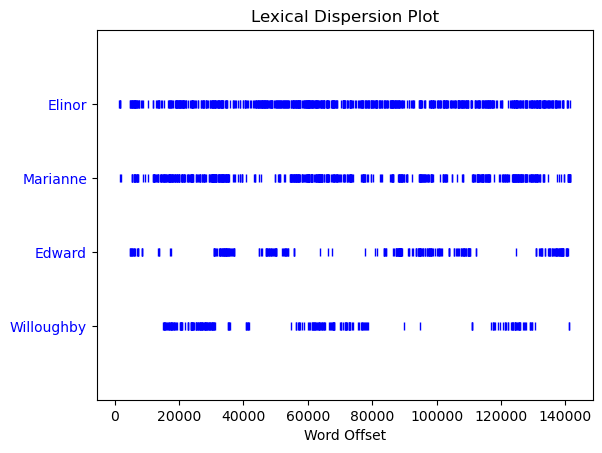

None
wanna chat; PART JOIN; MODE #14-19teens; JOIN PART; PART PART;
cute.-ass MP3; MP3 player; JOIN JOIN; times .. .; ACTION watches; guys
wanna; song lasts; last night; ACTION sits; -...)...- S.M.R.; Lime
Player; Player 12%; dont know; lez gurls; long time
None
My String
My StringMy String
My StringMy StringMy String
Mysent
6
6
<generator object <genexpr> at 0x000001A0AE625770>
K . C . CHAPTER I THE TWO POETS OF SAFFRON PARK THE suburb of Saffron Park lay on the sunset side of London , as red and ragged as a cloud of sunset . It was built of a
['!', '!"', '!"--', "!'", '!\'"', '!)', '!)"', '!*', '!--', '!--"', "!--'", '"', '"\'', '"--', '"...', '";', '$', '&', "'", "',", "',--", "'-", "'--", "';", '(', ')', '),', ')--', ').', ').--', '):', ');', ');--', '*', ',', ',"', ',"--', ",'", ",'--", ',)', ',*', ',--', ',--"', ",--'", '-', '--', '--"', "--'", '--\'"', '--(', '---"', '---,', '.', '."', '."*', '."--', ".'", '.\'"', '.)', '.*', '.*--', '.,', '.--', '.--"', '...', '....', '.]', '00

In [35]:
#exercise
#2 26**100
#3
from numpy import split


print(['monty','python']*20)
print(3*sent1)
#4
print(len(text2))
print(len(set(text2)))
#5 humor
#6 
print(text2.dispersion_plot(["Elinor", "Marianne", "Edward", "Willoughby"]))
#7
print(text5.collocations())
#8 the number of distinct words
#9
my_string = 'My String'
my_string
print(my_string)
print(my_string+my_string)
print(my_string*3)
#10
my_sent = ["My", "sent"] 
print(''.join(my_sent))
#11
a = ['a','b','c']
b = ['s','s','s']
print(len(a+b))
print(len(a)+len(b))
#12 b
#15
print(w for w in set(text5) if w.startwith('b'))
#17
sunset_index=text9.index('sunset')
sentence_slice = text9[sunset_index-20:sunset_index+20]  # Adjust slice range as needed
print(' '.join(sentence_slice))
#19
print(sorted(set(w.lower() for w in text1)))
print(sorted(w.lower() for w in set(text1)))
#22
four_letter_words = [word for word in text5 if len(word) == 4]
freq_dist = FreqDist(four_letter_words)
for word, frequency in freq_dist.most_common():
    print(f'{word}: {frequency}')
#23
for i in text6:
    if i.istitle() or i.isupper():
        print(i)
    else:
        continue
#26
av_len = sum(len(w) for w in text1)/len(text1)
#27
def vocab_size(text):
    return len(set(text))
#28
def percent(word, text):
    word_count = text.count(word)
    total_words = len(text)
    percentage = (word_count / total_words) * 100
    return percentage


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK. 
> 
> Reading: NLPP Chapter 2.1 - 2.4\.
> 

> *Exercises*: NLPP Chapter 2\.
> 
> * Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.
> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.arteuna.com/talleres/lab/ediciones/libreria/Glottometrics-zipf.pdf#page=148) and write a paragraph or two describing other important instances of power-laws found on the internet.

<div class="alert alert-block alert-info">
Again, try not to use an LLM to solve these ones. Once you have written down an answer to the Zipf exercise, it's OK to ask an LLM to criticize it to make it better.
</div>

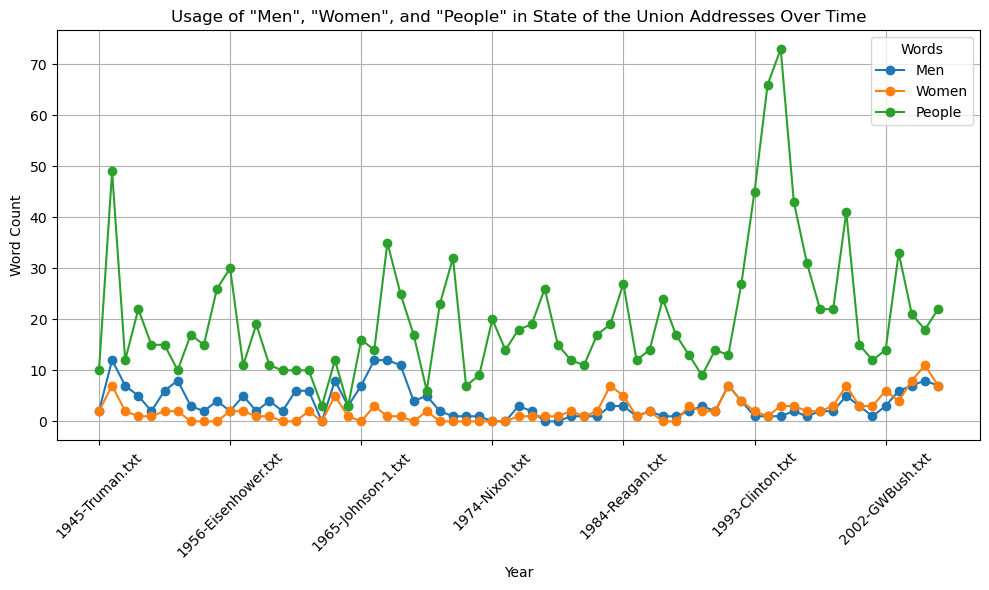

In [41]:
#4
def count_words_in_text(text, words):
    word_counts = {}
    for word in words:
        word_counts[word] = text.count(word.lower())
    return word_counts
words_to_count = ["men", "women", "people"]
word_counts_by_year = {}

for fileid in state_union.fileids():
    text = [word.lower() for word in state_union.words(fileid)]
    word_counts_by_year[fileid] = count_words_in_text(text, words_to_count)

df = pd.DataFrame(word_counts_by_year).T
df.columns = ['Men', 'Women', 'People']
df.index.name = 'Year (Document)'

df.sort_index(inplace=True)
plt.figure(figsize=(10, 6))

df.plot(kind='line', marker='o', ax=plt.gca())

plt.title('Usage of "Men", "Women", and "People" in State of the Union Addresses Over Time')
plt.xlabel('Year')
plt.ylabel('Word Count')

plt.legend(title='Words')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
#8
#11
#15
#16
#17
#18
#23

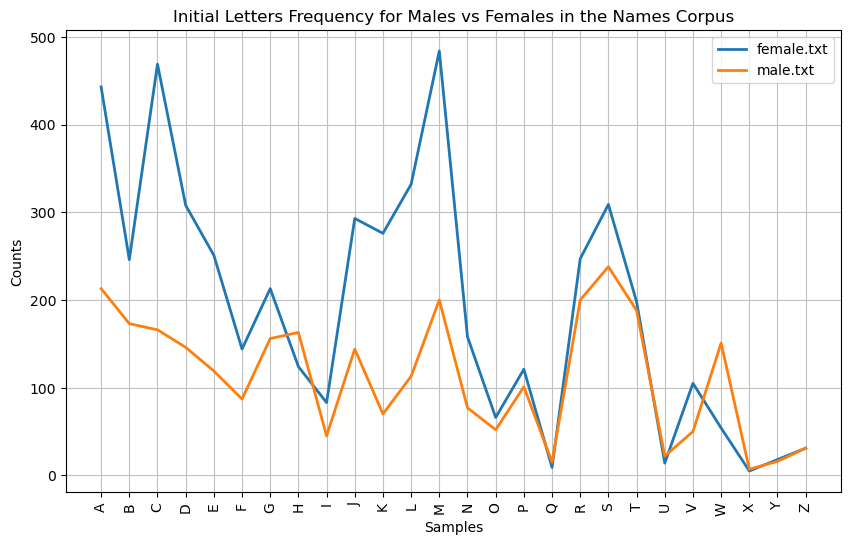

In [43]:
#8
# Create a conditional frequency distribution
def gender_initial_letter_distribution():
    cfd = ConditionalFreqDist(
        (gender, name[0])  # gender and the initial letter of the name
        for gender in names.fileids()  # 'male.txt' and 'female.txt'
        for name in names.words(gender)
    )
    return cfd

# Get the CFD
cfd = gender_initial_letter_distribution()

# Plot the results
plt.figure(figsize=(10, 6))
cfd.plot(title="Initial Letters Frequency for Males vs Females in the Names Corpus")
plt.show()


[nltk_data] Downloading package brown to E:\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package stopwords to E:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


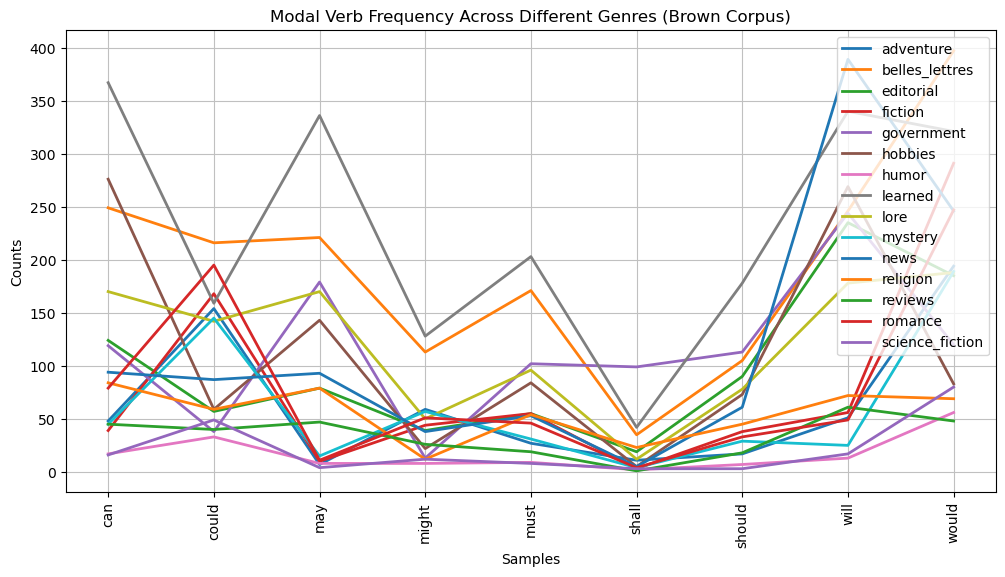

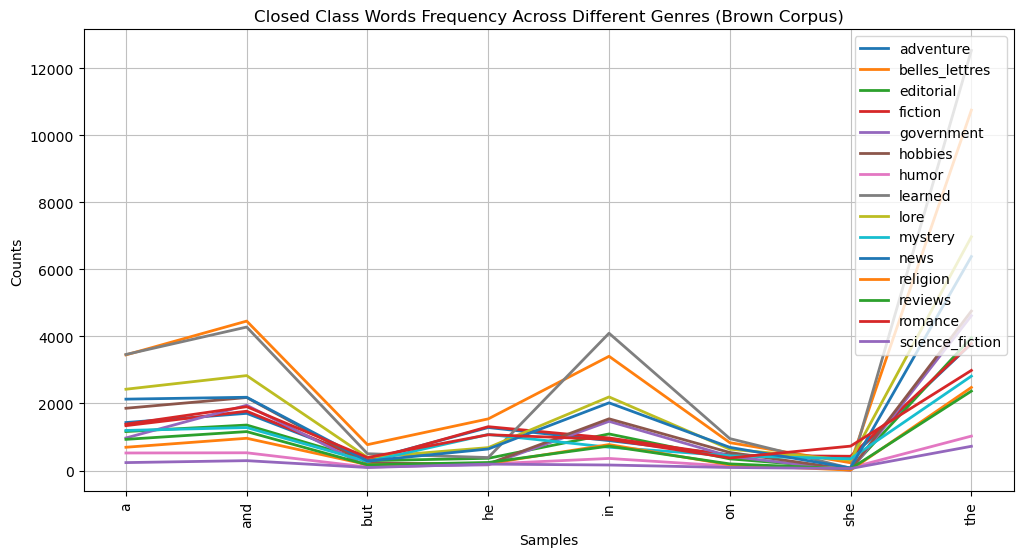

In [45]:
#11
# Download required resources
nltk.download('brown')
nltk.download('stopwords')

# Define modals and closed classes
modals = ['can', 'could', 'may', 'might', 'must', 'shall', 'should', 'will', 'would']
closed_classes = ['the', 'a', 'he', 'she', 'in', 'on', 'and', 'but']

# Create Conditional Frequency Distribution for modals and closed classes across genres
genres = brown.categories()

# Function to analyze modals and closed classes
def analyze_genres():
    cfd_modals = ConditionalFreqDist(
        (genre, word.lower())
        for genre in genres
        for word in brown.words(categories=genre)
        if word.lower() in modals
    )
    
    cfd_closed_classes = ConditionalFreqDist(
        (genre, word.lower())
        for genre in genres
        for word in brown.words(categories=genre)
        if word.lower() in closed_classes
    )
    
    return cfd_modals, cfd_closed_classes

# Get the distributions
cfd_modals, cfd_closed_classes = analyze_genres()

# Plotting modal verbs across different genres
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
cfd_modals.plot(title="Modal Verb Frequency Across Different Genres (Brown Corpus)")

# Plotting closed classes across different genres
plt.figure(figsize=(12, 6))
cfd_closed_classes.plot(title="Closed Class Words Frequency Across Different Genres (Brown Corpus)")

plt.show()


In [46]:
#15
words = brown.words()

# Create a frequency distribution of all words
freq_dist = FreqDist(word.lower() for word in words)

# Find all words that occur at least three times
words_at_least_three_times = [word for word, count in freq_dist.items() if count >= 3]

# Display the result (first 20 words for brevity)
print(words_at_least_three_times[:20])

['the', 'fulton', 'county', 'grand', 'jury', 'said', 'friday', 'an', 'investigation', 'of', "atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that']


In [47]:
#17
def lexical_diversity(text):
    return len(text) / len(set(text))

# Dictionary to store the lexical diversity for each genre
lexical_diversity_by_genre = {}

# Loop through each genre in the Brown Corpus
for genre in brown.categories():
    words_in_genre = brown.words(categories=genre)
    lexical_diversity_by_genre[genre] = lexical_diversity(words_in_genre)

# Sorting the genres by lexical diversity
sorted_lexical_diversity = sorted(lexical_diversity_by_genre.items(), key=lambda item: item[1])

# Displaying the result
df = pd.DataFrame(sorted_lexical_diversity, columns=["Genre", "Lexical Diversity (Token/Type Ratio)"])
print(df)

              Genre  Lexical Diversity (Token/Type Ratio)
0             humor                              4.324297
1   science_fiction                              4.475719
2           reviews                              4.718757
3          religion                              6.182175
4         editorial                              6.228918
5           hobbies                              6.899455
6              news                              6.985827
7           fiction                              7.362718
8              lore                              7.605254
9         adventure                              7.814064
10          mystery                              8.188055
11          romance                              8.284666
12       government                              8.570713
13   belles_lettres                              9.396667
14          learned                             10.788778


In [49]:
#18
def most_frequent_non_stopwords(text):
    # Get the list of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Filter out stopwords from the text
    filtered_words = [word.lower() for word in text if word.lower() not in stop_words and word.isalpha()]
    
    # Create a frequency distribution of the filtered words
    freq_dist = FreqDist(filtered_words)
    
    # Return the 50 most common words
    return freq_dist.most_common(50)

# Example usage with a sample text (replace with an actual text or corpus)
text = ["This", "is", "a", "sample", "text", "with", "some", "common", "words", "and", "some", "unique", "words"]
most_frequent_words = most_frequent_non_stopwords(text)
print(most_frequent_words)

[('words', 2), ('sample', 1), ('text', 1), ('common', 1), ('unique', 1)]


[nltk_data] Downloading package gutenberg to E:\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt to E:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


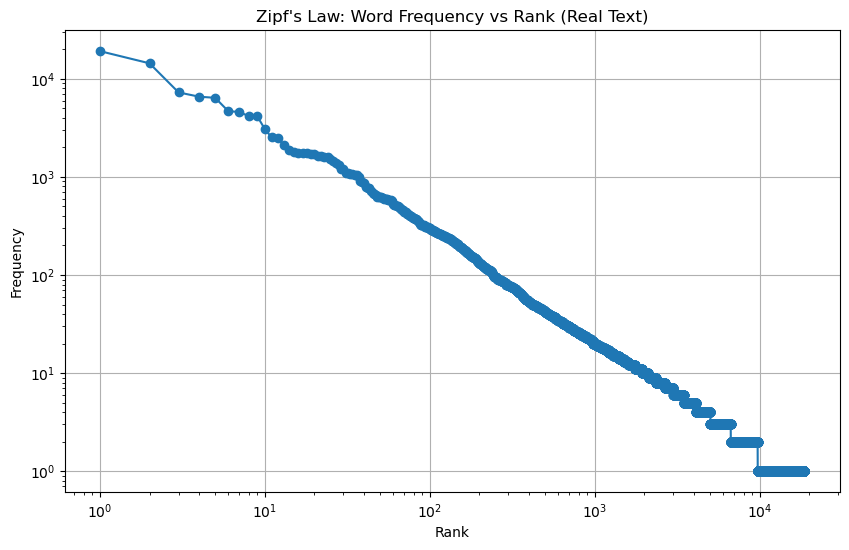

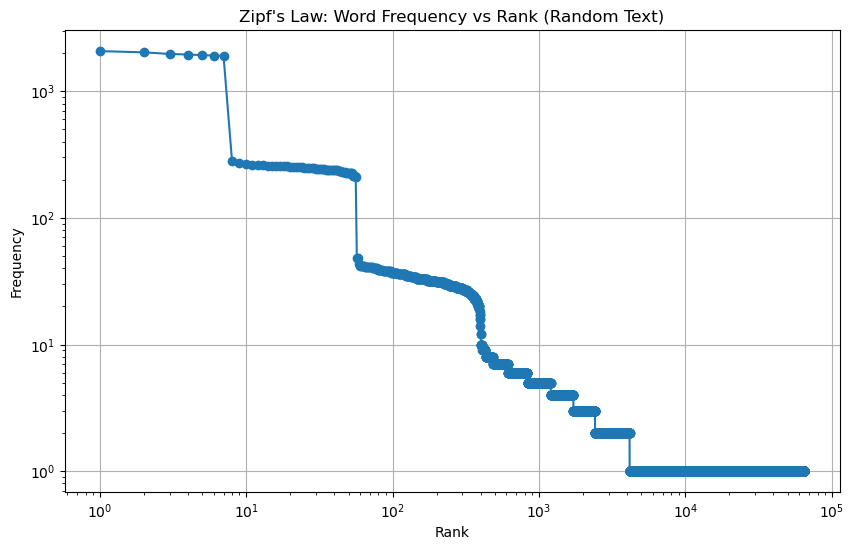

In [53]:
#23

# Download necessary data
nltk.download('gutenberg')
nltk.download('punkt')

# 1. Process large text and plot word frequency against rank
def plot_zipfs_law(text):
    # Tokenize the text into words
    words = nltk.word_tokenize(text.lower())
    
    # Count the frequency of each word
    word_freq = Counter(words)
    
    # Rank the words by frequency (highest frequency gets rank 1)
    sorted_word_freq = sorted(word_freq.values(), reverse=True)
    
    # Generate rank values
    ranks = np.arange(1, len(sorted_word_freq) + 1)
    
    # Plot the frequency vs rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_word_freq, marker="o")
    plt.title('Zipf\'s Law: Word Frequency vs Rank (Real Text)')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Example usage with a real text (using a large text from Project Gutenberg)
text = nltk.corpus.gutenberg.raw('melville-moby_dick.txt')
plot_zipfs_law(text)

# 2. Generate random text and plot Zipf's Law
def generate_random_text(length):
    # Generate random text using characters from 'abcdefg ' and a space
    chars = "abcdefg "
    random_text = ''.join(random.choice(chars) for _ in range(length))
    return random_text

# Tokenize and process random text
def plot_random_zipfs_law(length):
    random_text = generate_random_text(length)
    
    # Tokenize the random text into words (split by space)
    words = random_text.split()
    
    # Count the frequency of each word
    word_freq = Counter(words)
    
    # Rank the words by frequency (highest frequency gets rank 1)
    sorted_word_freq = sorted(word_freq.values(), reverse=True)
    
    # Generate rank values
    ranks = np.arange(1, len(sorted_word_freq) + 1)
    
    # Plot the frequency vs rank on a log-log scale
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, sorted_word_freq, marker="o")
    plt.title('Zipf\'s Law: Word Frequency vs Rank (Random Text)')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Generate and plot for random text (length of 1 million characters)
plot_random_zipfs_law(1000000)
